In [1]:
import pandas as pd

df = pd.read_csv('data/50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [2]:
import seaborn as sns

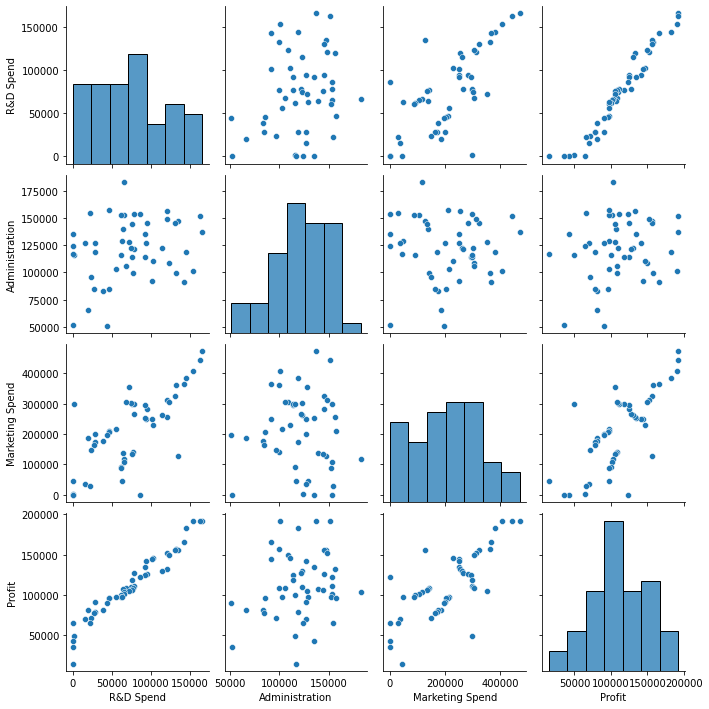

In [3]:
sns.pairplot(df)

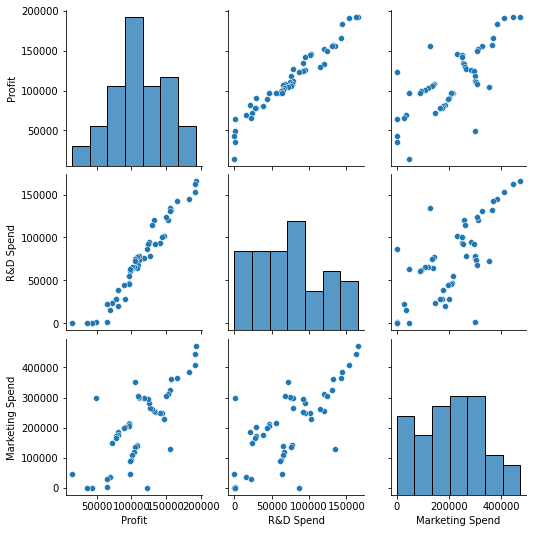

In [4]:
sns.pairplot(df[['Profit', "R&D Spend", "Marketing Spend"]])

In [8]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(df[['Profit', "R&D Spend", "Marketing Spend"]])
df_scaled = scaler.transform(df[['Profit', "R&D Spend", "Marketing Spend"]])

In [16]:
df_scaled.shape

(50, 3)

In [13]:
df_scaled_df = pd.DataFrame(df_scaled)
df_scaled_df.columns = ['profit', 'rd', 'ms']
df_scaled_df.head()

,profit,rd,ms
0,2.011203,2.016411,2.153943
1,1.999430,1.955860,1.923600
2,1.980842,1.754364,1.626528
3,1.776627,1.554784,1.422210
4,1.357740,1.504937,1.281528


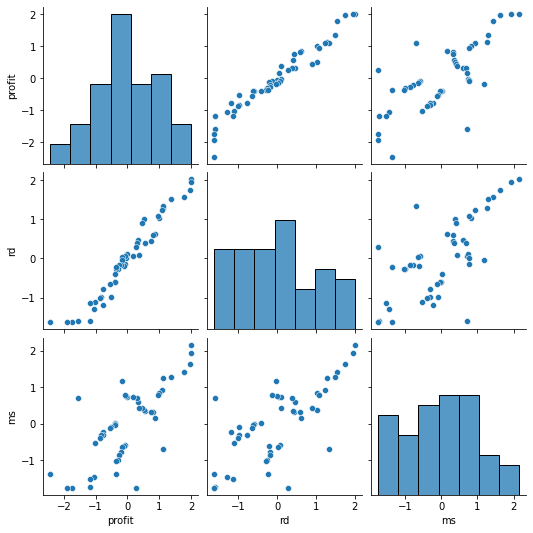

In [17]:
sns.pairplot(df_scaled_df)

In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(df_scaled_df[['rd', 'ms']])

PCA(n_components=2)

In [19]:
X = pca.transform(df_scaled_df[['rd', 'ms']])

In [20]:
import matplotlib.pyplot as plt

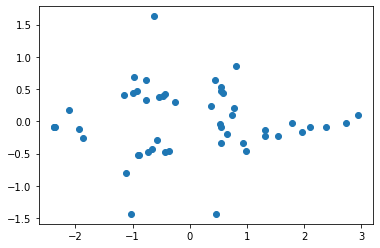

In [22]:
plt.scatter(X[:,0], X[:,1])

1.759436870463142
[2.8137992 2.8137992]
0.28137945606747017
[-1.12525888  1.12525888]


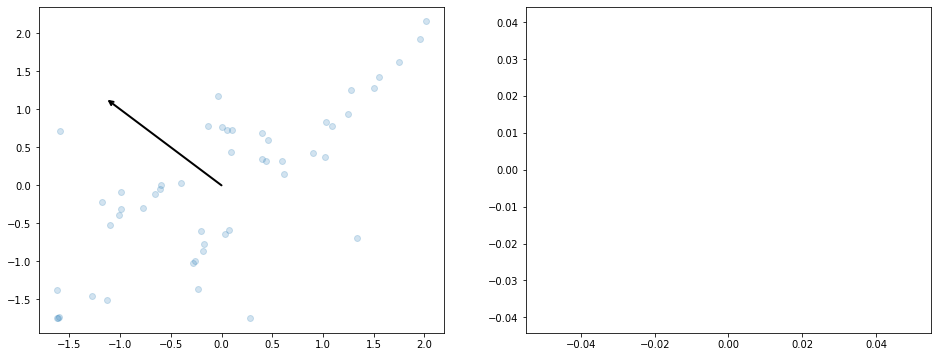

In [46]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

fig, axs = plt.subplots(1,2,figsize=(16, 6))

# plot data
axs[0].scatter(df_scaled_df.loc[:, 'rd'], df_scaled_df.loc[:, 'ms'], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    print(length)
    v = vector * 3 * np.sqrt(length)
    print(v)
    draw_vector(pca.mean_, pca.mean_ + v, ax = axs[0])
plt.axis('equal');

In [33]:
pca.components_

array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]])